In [1]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
Using cached xgboost-2.0.1-py3-none-win_amd64.whl (99.7 MB)


In [3]:
import torch
import numpy as np
import pandas as pd
import os
import sys

In [4]:
import time

In [5]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from torch.utils.data import TensorDataset, DataLoader

In [8]:
import torch.nn as nn
from torch import optim

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler

In [32]:
import xgboost as xgb

In [33]:
from xgboost import XGBClassifier

## Load in the data

In [12]:
data = pd.read_csv('../data/gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2/features_v2.csv')

In [13]:
data.head()

,session,trial,filename,crest_factor_F1,dasd_F1,diffvar_F1,form_factor_F1,iemg_F1,kurtosis_F1,kurtosis_f_F1,...,rms_W9,skew_W9,skew_f_W9,ssi_W9,sum_f_W9,var_f_W9,wflen_W9,willison_W9,gesture,participant
0,1,1,E:\DS5500-project\data\gesture-recognition-and...,7.091099,0.021834,0.000606,-6502.754507,365.456658,2.574033,85.547962,...,0.022588,-0.148877,5.529415,5.224663,0.109574,2.901826e-10,69.944068,15.0,10,1
1,1,2,E:\DS5500-project\data\gesture-recognition-and...,13.324514,0.023852,0.000689,1352.897349,379.664639,16.942218,329.114870,...,0.016172,-0.205427,9.332349,2.677940,0.077566,2.769772e-10,54.530919,23.0,10,1
2,1,3,E:\DS5500-project\data\gesture-recognition-and...,8.047954,0.016213,0.000326,1295.052394,296.823135,3.795827,134.751765,...,0.017039,-0.204604,9.078430,2.973002,0.064458,1.426359e-10,57.815909,13.0,10,1
3,1,4,E:\DS5500-project\data\gesture-recognition-and...,8.459555,0.026572,0.000864,14453.068135,479.688214,6.938354,98.832790,...,0.031982,-0.266818,5.067522,10.473811,0.131909,4.509337e-10,83.441138,0.0,10,1
4,1,5,E:\DS5500-project\data\gesture-recognition-and...,8.329011,0.026896,0.000901,11827.310277,464.350257,2.379207,116.412205,...,0.031134,-0.092205,5.414199,9.925787,0.177516,9.577100e-10,94.393506,3.0,10,1


In [14]:
data.columns

Index(['session', 'trial', 'filename', 'crest_factor_F1', 'dasd_F1',
       'diffvar_F1', 'form_factor_F1', 'iemg_F1', 'kurtosis_F1',
       'kurtosis_f_F1',
       ...
       'rms_W9', 'skew_W9', 'skew_f_W9', 'ssi_W9', 'sum_f_W9', 'var_f_W9',
       'wflen_W9', 'willison_W9', 'gesture', 'participant'],
      dtype='object', length=761)

In [16]:
feature_cols = [c for c in data.columns if "_" in c]

In [18]:
len(feature_cols)

756

In [13]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [23]:
X = data.loc[:, feature_cols].values
Y = (data.loc[:, 'gesture']-1).values

In [24]:
X.shape

(15351, 756)

In [26]:
Y.shape

(15351,)

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=6483)

In [29]:
feature_names = feature_cols

In [30]:
feature_names

['crest_factor_F1',
 'dasd_F1',
 'diffvar_F1',
 'form_factor_F1',
 'iemg_F1',
 'kurtosis_F1',
 'kurtosis_f_F1',
 'mav_F1',
 'max_F1',
 'max_f_F1',
 'mean_F1',
 'mean_f_F1',
 'min_F1',
 'myopulse_F1',
 'p2p_F1',
 'peak_F1',
 'peak_f_F1',
 'power_F1',
 'pulse_indicator_F1',
 'rms_F1',
 'skew_F1',
 'skew_f_F1',
 'ssi_F1',
 'sum_f_F1',
 'var_f_F1',
 'wflen_F1',
 'willison_F1',
 'crest_factor_F10',
 'dasd_F10',
 'diffvar_F10',
 'form_factor_F10',
 'iemg_F10',
 'kurtosis_F10',
 'kurtosis_f_F10',
 'mav_F10',
 'max_F10',
 'max_f_F10',
 'mean_F10',
 'mean_f_F10',
 'min_F10',
 'myopulse_F10',
 'p2p_F10',
 'peak_F10',
 'peak_f_F10',
 'power_F10',
 'pulse_indicator_F10',
 'rms_F10',
 'skew_F10',
 'skew_f_F10',
 'ssi_F10',
 'sum_f_F10',
 'var_f_F10',
 'wflen_F10',
 'willison_F10',
 'crest_factor_F11',
 'dasd_F11',
 'diffvar_F11',
 'form_factor_F11',
 'iemg_F11',
 'kurtosis_F11',
 'kurtosis_f_F11',
 'mav_F11',
 'max_F11',
 'max_f_F11',
 'mean_F11',
 'mean_f_F11',
 'min_F11',
 'myopulse_F11',
 'p2p_F

In [34]:
cls = XGBClassifier(n_jobs = 6)

In [35]:
start = time.time()
cls.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], early_stopping_rounds=10, verbose=True)
print(f"Time taken: {time.time() - start}")

C:\Users\tanma\anaconda3\envs\cs7150\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.77036	validation_1-mlogloss:1.99526
[1]	validation_0-mlogloss:1.42335	validation_1-mlogloss:1.73543
[2]	validation_0-mlogloss:1.18160	validation_1-mlogloss:1.54774
[3]	validation_0-mlogloss:0.99895	validation_1-mlogloss:1.40479
[4]	validation_0-mlogloss:0.85179	validation_1-mlogloss:1.29279
[5]	validation_0-mlogloss:0.73556	validation_1-mlogloss:1.20301
[6]	validation_0-mlogloss:0.63962	validation_1-mlogloss:1.12426
[7]	validation_0-mlogloss:0.55886	validation_1-mlogloss:1.05800
[8]	validation_0-mlogloss:0.49061	validation_1-mlogloss:0.99987
[9]	validation_0-mlogloss:0.43375	validation_1-mlogloss:0.94934
[10]	validation_0-mlogloss:0.38553	validation_1-mlogloss:0.90370
[11]	validation_0-mlogloss:0.34252	validation_1-mlogloss:0.86487
[12]	validation_0-mlogloss:0.30666	validation_1-mlogloss:0.83070
[13]	validation_0-mlogloss:0.27331	validation_1-mlogloss:0.80207
[14]	validation_0-mlogloss:0.24707	validation_1-mlogloss:0.77698
[15]	validation_0-mlogloss:0.22318	

## Check Result

In [36]:
y_pred = cls.predict(x_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       176
           1       0.77      0.80      0.78       188
           2       0.81      0.85      0.83       182
           3       0.79      0.77      0.78       195
           4       0.83      0.85      0.84       177
           5       0.92      0.84      0.88       171
           6       0.76      0.79      0.78       180
           7       0.92      0.90      0.91       186
           8       0.84      0.83      0.83       192
           9       0.89      0.85      0.87       209
          10       0.97      0.97      0.97       170
          11       0.96      0.92      0.94       179
          12       0.94      0.94      0.94       185
          13       0.95      0.95      0.95       173
          14       0.86      0.93      0.89       155
          15       0.79      0.78      0.78       174
          16       0.94      0.99      0.96       179

    accuracy              

In [50]:
cls.feature_importances_.shape

(568,)

In [51]:
fi_df = pd.DataFrame({"name": feature_names, "values": cls.feature_importances_})

In [52]:
fi_df

,name,values
0,iemg,0.003313
1,mav,0.000000
2,ssi,0.002291
3,myopulse,0.004366
4,wflen,0.130241
...,...,...
563,kurtosis_f_w8,0.000000
564,kurtosis_f_w9,0.000000
565,kurtosis_f_w10,0.000000
566,kurtosis_f_w11,0.000000


In [53]:
fi_df.sort_values(by = "values", ascending=False).head(30)

,name,values
4,wflen,0.130241
334,rms_w3,0.022068
22,power_f15,0.021282
262,min_f3,0.015149
133,skew_f14,0.012188
138,skew_w3,0.009369
128,skew_f9,0.009346
341,rms_w10,0.008319
27,power_w4,0.008283
146,skew_w11,0.007870


<AxesSubplot:xlabel='name'>

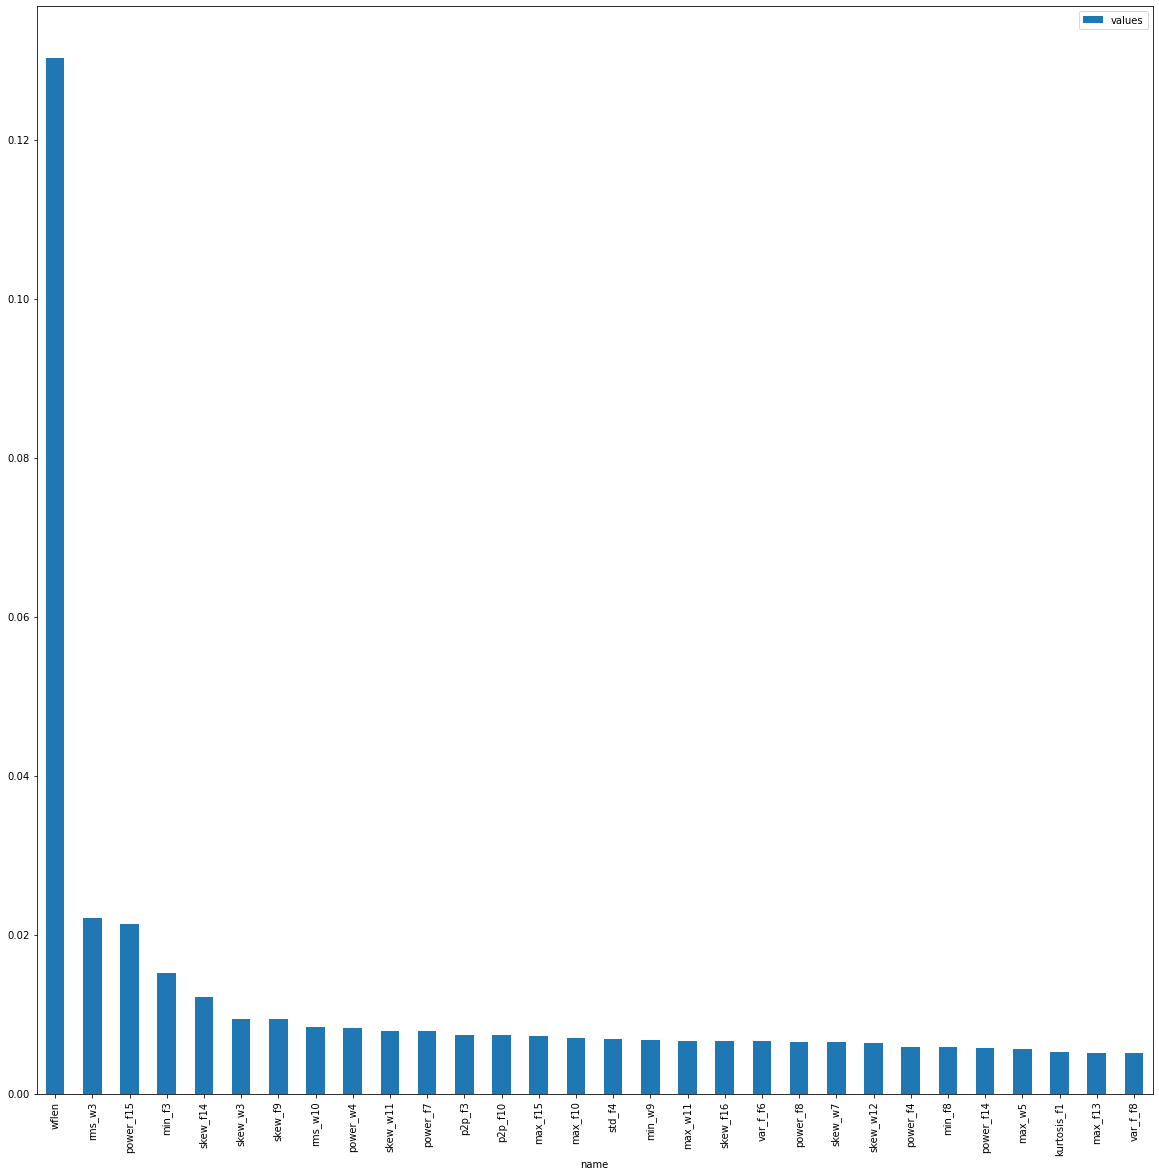

In [54]:

fi_df.sort_values(by = "values", ascending=False)[:30].plot.bar(x = "name", y = "values", figsize = (20,20))